<a href="https://colab.research.google.com/github/thoriqkemal/klasifikasi-gambar/blob/main/Klasifikasi_Gambar_Thoriq_Kemal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/sudarmintosenlau/Image-Classification/blob/main/Submission_Belajar_ML_buat_Pemula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><bold>Thoriq Kemal</bold></center></h1>

[Email](mailto:thoriqekemal@gmail.com)

[LinkedIn](https://www.linkedin.com/in/thoriqkemal/)

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
!wget --no-check-certificate \
  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2024-03-16 05:34:42--  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip
Resolving dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)... 172.64.145.29, 104.18.42.227, 2606:4700:4400::6812:2ae3, ...
Connecting to dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)|172.64.145.29|:443... connected.
HTTP request sent, awaiting response... 200 OK
Cookie coming from dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com attempted to set domain to digitaloceanspaces.com
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  99.0MB/s    in 0.7s    

2024-03-16 05:34:43 (99.0 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [ ]:
# melakukan ekstraksi pada file zip
import zipfile, os
local_zip = "/tmp/messy_vs_clean_room.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
# cek direktori data latih
os.listdir('/tmp/images/train')

['clean', 'messy']

In [ ]:
# cek direktori data validasi
os.listdir('/tmp/images/val')

['clean', 'messy']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
  rescale = 1./255,
  rotation_range=20,
  horizontal_flip = True,
  shear_range = 0.2,
  fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(
  rescale = 1./255
)

In [ ]:
# menyiapkan data latih
train_generator = train_datagen.flow_from_directory(
  train_dir, # direktori data latih
  target_size = (150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
  batch_size = 4,
  # karena ini merupakan masalah klasifikasi 2 kelas, gunakan class_mode = 'binary
  class_mode = "binary"
)

# menyiapkan data validasi
validation_generator = test_datagen.flow_from_directory(
  validation_dir, # direktori data validasi
  target_size = (150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
  batch_size = 4,
  # karena ini merupakan masalah klasifikasi 2 kelas, gunakan class_mode = 'binary
  class_mode = "binary"
)

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(512, (3, 3), activation = 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation = 'relu'),
  tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
# melihat ringkasan dari arsitektur model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy'
model.compile(
  loss = 'binary_crossentropy',
  optimizer = tf.optimizers.Adam(),
  metrics = ['accuracy']
)

In [ ]:
# latih model dengan model.fit
import scipy.ndimage
# from  scipy import ndimage

model.fit(
  train_generator,
  steps_per_epoch = 25, # berapa batch yang akan dieksekusi pada setiap epoch
  epochs = 20, # tambahkan epochs jika akurasi model belum optimal
  validation_data = validation_generator, # menampilkan akurasi pengujian data validasi
  validation_steps = 5, # berapa batch yang akan dieksekusi pada setiap epoch
  verbose = 2
)

Epoch 1/20
25/25 - 17s - loss: 0.7939 - accuracy: 0.5000 - val_loss: 0.6918 - val_accuracy: 0.5000 - 17s/epoch - 680ms/step
Epoch 2/20
25/25 - 15s - loss: 0.6974 - accuracy: 0.4800 - val_loss: 0.6928 - val_accuracy: 0.5000 - 15s/epoch - 600ms/step
Epoch 3/20
25/25 - 14s - loss: 0.6928 - accuracy: 0.5100 - val_loss: 0.6909 - val_accuracy: 0.5000 - 14s/epoch - 565ms/step
Epoch 4/20
25/25 - 15s - loss: 0.6973 - accuracy: 0.4200 - val_loss: 0.6932 - val_accuracy: 0.5000 - 15s/epoch - 592ms/step
Epoch 5/20
25/25 - 15s - loss: 0.6933 - accuracy: 0.5100 - val_loss: 0.6931 - val_accuracy: 0.5000 - 15s/epoch - 600ms/step
Epoch 6/20
25/25 - 14s - loss: 0.6927 - accuracy: 0.5300 - val_loss: 0.6914 - val_accuracy: 0.5000 - 14s/epoch - 567ms/step
Epoch 7/20
25/25 - 14s - loss: 0.6787 - accuracy: 0.5900 - val_loss: 0.6661 - val_accuracy: 0.5000 - 14s/epoch - 566ms/step
Epoch 8/20
25/25 - 14s - loss: 0.7196 - accuracy: 0.6400 - val_loss: 0.6358 - val_accuracy: 0.5500 - 14s/epoch - 559ms/step
Epoch 9/

Saving 22.png to 22 (1).png
Saving 23.png to 23.png
1/1 [==============================] - 0s 48ms/step
22 (1).png
clean
1/1 [==============================] - 0s 45ms/step
23.png
messy


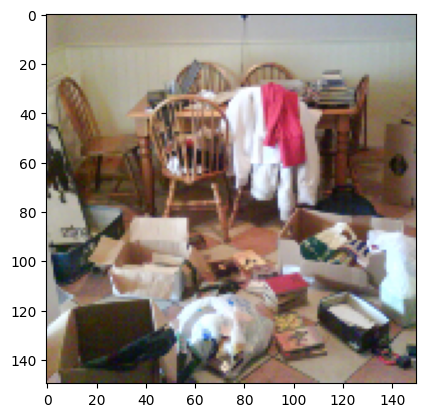

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size = 10)
  print(fn)
  if classes == 0:
    print('clean')
  else:
    print('messy')